# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
    Running setup.py install for tensorflow-gpu: started
    Running setup.py install for tensorflow-gpu: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'd:\imageclassification\imageclasskernel\scripts\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\irems\\AppData\\Local\\Temp\\pip-install-tdfq3pxx\\tensorflow-gpu\\setup.py'"'"'; __file__='"'"'C:\\Users\\irems\\AppData\\Local\\Temp\\pip-install-tdfq3pxx\\tensorflow-gpu\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\irems\AppData\Local\Temp\pip-wheel-8rybltlv'
       cwd: C:\Users\irems\AppData\Local\Temp\pip-install-tdfq3pxx\tensorflow-gpu\
  Complete output (17 lines):
  Traceback (most recent call last):
    File "<string>", line 1, in <module>
    File "C:\Users\irems\AppData\Local\Temp\pip-install-tdfq3pxx\tensorflow-gpu\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" pack

In [2]:
pip install tensorflow  opencv-python matplotlib

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\ImageClassification\imageclasskernel\Scripts\python.exe -m pip install --upgrade pip' command.


# 3. Load Data

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import joblib

# CSV dosyanızı yükleyin
data = pd.read_csv('weatherHistory.csv')

weather_category_column = 'Summary'

label = data[weather_category_column]

# Veri setinizdeki kategorik sütunları sayısal değerlere dönüştürün
label_encoder = LabelEncoder()
data['label'] = label_encoder.fit_transform(data['label'])

# Bağımsız değişkenleri (X) ve bağımlı değişkeni (y) ayırın
X = data.drop('label', axis=1)
y = data['label']

# Eğitim ve test setlerine ayırın
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli oluşturun ve eğitin (Bu örnekte RandomForest kullanıyoruz)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Modelin performansını değerlendirin
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Test Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)

# Eğitilmiş modeli kaydedin
joblib.dump(model, 'trained_model.joblib')


KeyError: 'label'

# 4. Scale Data

In [8]:
from PIL import Image
import numpy as np

def load_and_preprocess_image(file_path, target_size=(256, 256)):
    img = Image.open(file_path)
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0  # Normalizasyon
    return img_array

X_train = np.array([load_and_preprocess_image(path) for path in X_train])
X_val = np.array([load_and_preprocess_image(path) for path in X_val])
X_test = np.array([load_and_preprocess_image(path) for path in X_test])



AttributeError: 'DataFrame' object has no attribute 'map'

# 6. Build and Test

In [ ]:
from sklearn.metrics import confusion_matrix

# Modelinizi eğitin (burada örnek bir Convolutional Neural Network kullanıyorum)
# Modelinizi uygun şekilde güncellemeniz gerekebilir.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Modelinizi eğitin (X_train ve y_train kullanılarak)
hist=model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Test seti üzerinde tahminlerde bulunun
y_pred = model.predict_classes(X_test)

# Karışıklık matrisini oluşturun
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)


In [46]:
model.compile('adam', loss=tf.losses.CategoricalCrossentropy(), metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 256, 256, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 127, 127, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0

# 8. Plot Performance

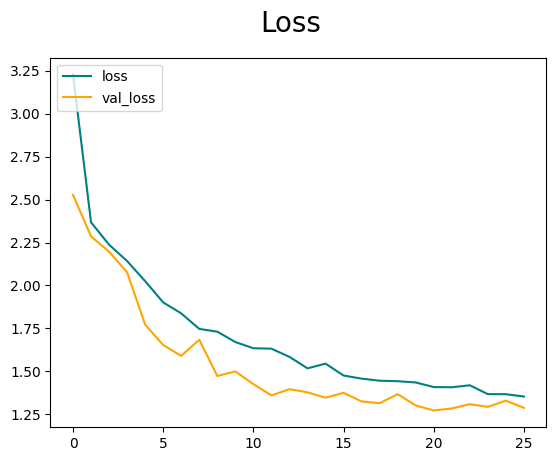

In [53]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

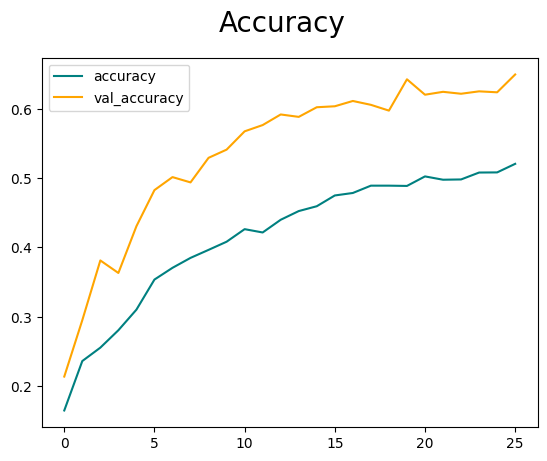

In [54]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [55]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import Accuracy

In [56]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [57]:
test = data.skip(train_size + val_size).take(test_size)

In [58]:
accuracy_metric = Accuracy()

for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    acc.update_state(y, yhat)
    accuracy_metric.update_state(tf.argmax(y, axis=1), tf.argmax(yhat, axis=1))


test_accuracy = accuracy_metric.result().numpy()
print(f'Test Accuracy: {test_accuracy}')

1/1 [==============================] - 0s 394ms/step
Test Accuracy: 0.5823863744735718


In [59]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.5823864, shape=(), dtype=float32)


# 10. Test

In [60]:
import cv2
import matplotlib.pyplot as plt

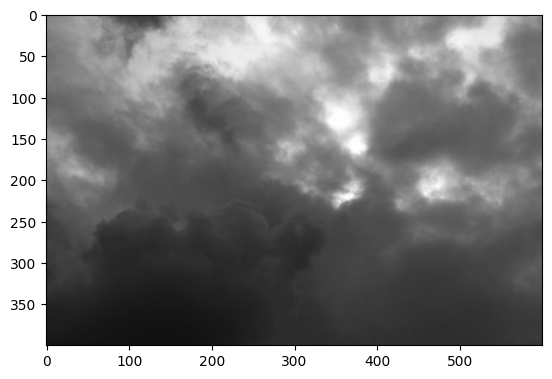

In [61]:
# Görüntüyü okuma ve uygun formatta yükleme
img = cv2.imread('data/cloudy/cloudy1.jpg')

# Görüntü boş mu kontrolü
if img is not None:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV, görüntüyü BGR formatında okur, bu nedenle RGB'ye dönüştürüyoruz

    # Görüntüyü gösterme
    plt.imshow(img)
    plt.show()
else:
    print("Görüntü yüklenemedi.")

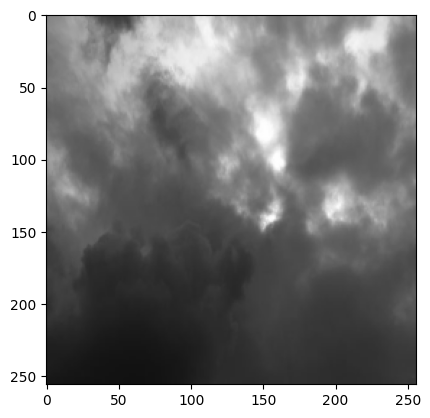

In [62]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [63]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 219ms/step


In [64]:
yhat

array([[1.92983344e-01, 1.08327381e-02, 3.43737662e-01, 1.21313278e-02,
        2.04769112e-02, 8.52979161e-03, 5.21604344e-02, 4.69584987e-02,
        1.09326951e-01, 8.71941522e-02, 5.48218265e-02, 4.97582816e-02,
        1.10397935e-02, 4.83490112e-05]], dtype=float32)

In [65]:
img_path = 'data/cloudy/cloudy1.jpg'
img = cv2.imread(img_path)

if img is not None:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resize = tf.image.resize(img, (256, 256))
    resize = np.expand_dims(resize / 255, 0)  

else:
    print(f"Error: Unable to read the image at {img_path}")


In [69]:
class_names = ['cloudy', 'dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'shine', 'snow', 'sunrise']
predictions = model.predict(resize)
predicted_class = np.argmax(predictions, axis=-1)

# Print some debug information
print(f'Predicted class indices: {predicted_class}')
if 0 <= predicted_class[0] < len(class_names):
    predicted_class_label = class_names[predicted_class[0]]
    print(f'Predicted class: {predicted_class_label}')
else:
    print('Error: Predicted class index is out of range.')

# Print class probabilities
for i, prob in enumerate(predictions[0]):
    class_label = class_names[i]
    print(f'Probability for class {class_label}: {prob}')


1/1 [==============================] - 0s 61ms/step
Predicted class indices: [2]
Predicted class: fogsmog
Probability for class cloudy: 0.19298334419727325
Probability for class dew: 0.010832738131284714
Probability for class fogsmog: 0.3437376618385315
Probability for class frost: 0.012131327763199806
Probability for class glaze: 0.02047691121697426
Probability for class hail: 0.008529791608452797
Probability for class lightning: 0.05216043442487717
Probability for class rain: 0.046958498656749725
Probability for class rainbow: 0.10932695120573044
Probability for class rime: 0.08719415217638016
Probability for class shine: 0.05482182651758194
Probability for class snow: 0.04975828155875206
Probability for class sunrise: 0.011039793491363525


IndexError: list index out of range

# 11. Save the Model

In [36]:
from tensorflow.keras.models import load_model

In [48]:
model.save(os.path.join('models','weatherforecast18.h5'))

In [37]:
new_model = load_model('D:\ImageClassification\models\weatherforecast18.h5')

In [38]:
model.load_weights('D:\ImageClassification\models\weatherforecast18.h5')

In [39]:
new_model.predict(np.expand_dims(resize/255, 0))


NameError: name 'resize' is not defined

# 12. Confusion Matrix

In [70]:
pip install -U scikit-learn scipy matplotlib

Requirement already up-to-date: scikit-learn in d:\imageclassification\imageclasskernel\lib\site-packages (1.0.2)
Requirement already up-to-date: scipy in d:\imageclassification\imageclasskernel\lib\site-packages (1.7.3)
Requirement already up-to-date: matplotlib in d:\imageclassification\imageclasskernel\lib\site-packages (3.5.3)
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'D:\ImageClassification\imageclasskernel\Scripts\python.exe -m pip install --upgrade pip' command.


In [71]:
!pip install seaborn

You should consider upgrading via the 'd:\imageclassification\imageclasskernel\scripts\python.exe -m pip install --upgrade pip' command.


1/1 [==============================] - 1s 516ms/step


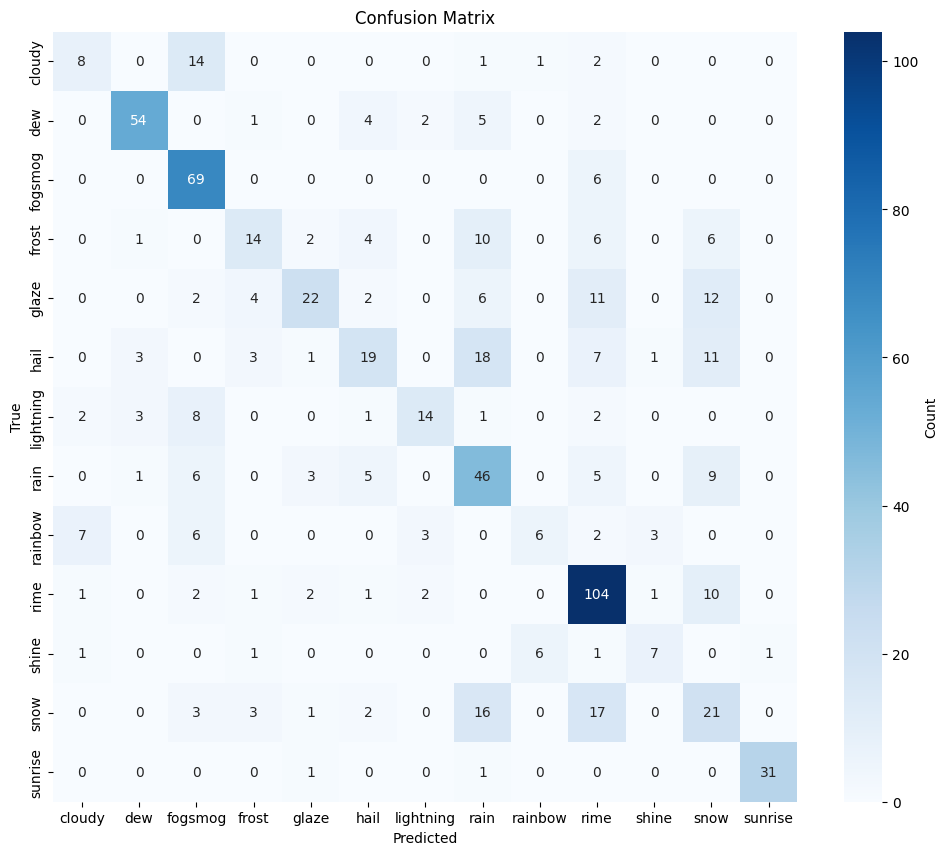

In [72]:
# Confusion Matrix oluşturma ve çizme
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

# Test veri seti üzerinde tahminlerin ve gerçek etiketlerin toplanması
y_true = []
y_pred = []

for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    
    # Sınıf indekslerini listeler içinde ekleyin
    y_true.append([np.argmax(label) for label in y])
    y_pred.append([np.argmax(pred) for pred in yhat])

# Listeleri numpy dizilerine çevirme
y_true = np.concatenate(y_true)
y_pred = np.concatenate(y_pred)

# Confusion Matrix oluşturma
conf_mat = confusion_matrix(y_true, y_pred)

# Sınıf isimleri
class_names = ['cloudy', 'dew', 'fogsmog', 'frost', 'glaze', 'hail', 'lightning', 'rain', 'rainbow', 'rime', 'shine', 'snow', 'sunrise']

# Pandas DataFrame'e dönüştürme
conf_mat_df = pd.DataFrame(conf_mat, index=class_names, columns=class_names)

# Confusion Matrix'i çizme
plt.figure(figsize=(12, 10))
sns.heatmap(conf_mat_df, annot=True, fmt='g', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



